<h1 style="color:rgb(0,120,170)">Assignment 4: PCA and Kernel PCA</h1>

This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this material, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

<h2 style="color:rgb(0,120,170)">Theoretical aspects concerning PCA</h2>

Our aim is to discuss a certain aspect of the mathematical derivation of PCA, that has not been adressed in full detail in the lectures. We use the same notation as in the lecture, i.e. we are given a data matrix $\mathbf{X}= ( \mathbf{x}_1,...,\mathbf{x}_n )^\top$, where each $\mathbf{x}_i \in \mathbb{R}^m$ for $1\le i \le n$. 

A main reason, why PCA works very well, is the fact that the covariance matrix, defined as $\mathbf{C}=\frac 1n \mathbf{X}^T\mathbf{X}$, or equivalently, $c_{st}=\frac1n \sum_{i=1}^n x_{is} x_{it}$, is positive semi-definite. 
* Show this fact by proving $\left\langle\mathbf{C}\mathbf{a},\mathbf{a}  \right\rangle= \sum_{s,t=1}^m a_s a_t c_{st} \geq 0$ for any $\mathbf{a} \in \mathbb{R}^m$. 
* Moreover, show that positive semi-definiteness of $\mathbf{C}$ implies that all eigenvalues are non-negative. 
* Why is this an important fact in PCA? 

<h3 style="color:rgb(210,90,80)">Exercise 1 (20 points):</h3>

########## YOUR SOLUTION HERE ##########

$ \Big < Ca,a\Big>  = \Big<\dfrac{1}{n}X^T X a, a \Big> = \dfrac{1}{n} \Big< Xa ,Xa \Big> = \dfrac{1}{n} || Xa ||^2 ≥ 0$

used rule for inner product:
$ \Big< u,v \Big> = \sum u_i v_i$

$ \Big< Ca,a \Big> = Ca ⋅ a = \sum^m_i (Ca)_i a_i $ 

<h2 style="color:rgb(0,120,170)">PCA applied to real world data set</h2>

We use the provided data set faces94.csv which is essentially based
on the pictures from the collection of Facial Images 1. This data set consists of $45 \times 50$
gray scale pixel images.
Let us first read in the data and plot the first image as an example.
This exercise should give you a feeling of what it really means to preserve variance.

In [1]:
#read data. Nothing to do here
import numpy as np
from sklearn.decomposition import PCA, KernelPCA
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline 

# import data from csv file,
data = np.genfromtxt('faces94.csv', delimiter=',')

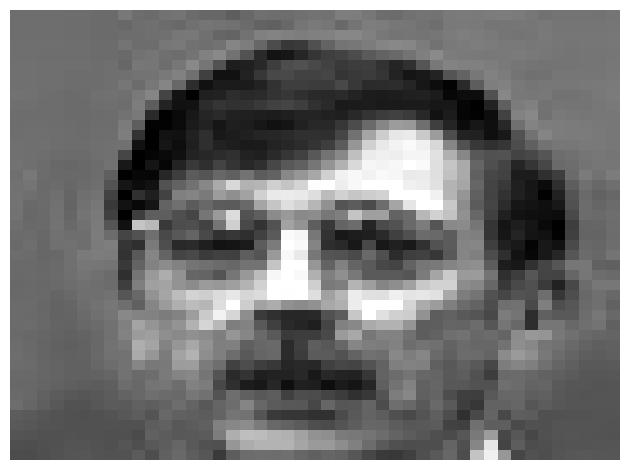

In [2]:
#plot first image as an example. Nothing to do here
def plotImg(x):
    fig, ax = plt.subplots()
    ax.pcolor(x.reshape(45, 50).T, cmap=cm.gray)
    ax.set_ylim([45, 0])
    ax.axis("off")
    fig.tight_layout()
    
# plot first img
plotImg(data[0, :])

<h3 style="color:rgb(210,90,80)">Exercise 2 (10 points):</h3>

We next use PCA for data-compression. Downproject the data using enough PCs to
explain $50 \% $, $75 \% $ and $99 \% $ of the variance. To do this use the sklearn-package. Print the number of principal components needed and also the explained variance for each of the tasks. 

In [3]:
########## YOUR SOLUTION HERE ##########
# Import data from csv file
data = np.genfromtxt('faces94.csv', delimiter=',')

# Define the variance thresholds
variance_thresholds = [0.5, 0.75, 0.99]

# Initialize lists to store the number of principal components and explained variance
num_components_list = []
explained_variance_list = []
pca_models = []
compressed_data_list = []

# Perform PCA for each variance threshold
for threshold in variance_thresholds:
    # Create PCA instance
    pca = PCA(n_components=threshold, svd_solver='full')
    
    # Fit PCA to the data
    pca.fit(data)
    
    # Get the number of principal components
    num_components = pca.n_components_
    
    # Get the explained variance ratio
    explained_variance = sum(pca.explained_variance_ratio_)
    
    # Store the results
    num_components_list.append(num_components)
    explained_variance_list.append(explained_variance)
    
    print(f"Number of principal components to explain {threshold * 100}% of variance: {num_components}")
    print(f"Explained variance: {explained_variance}\n")
    
    # Transform the data to lower dimensionality
    compressed_data = pca.transform(data)
    
    # Store the PCA model and compressed data
    pca_models.append(pca)
    compressed_data_list.append(compressed_data)
    



""" As in the previous assignment, there are components which give us more information about the data. 
And components which give us less information. In order to explain some amount of variance we need some amount of components
ussualy those with much information contained. The more variance we want the more components we need to include.
If we want to explain 20%, we could need 1 component if such component would give us suffucient amount of information.
If we want to exaplain 100% we need all components.
"""

Number of principal components to explain 50.0% of variance: 4
Explained variance: 0.5141740887481956

Number of principal components to explain 75.0% of variance: 18
Explained variance: 0.7562183511176105

Number of principal components to explain 99.0% of variance: 367
Explained variance: 0.9900368370506815



' As in the previous assignment, there are components which give us more information about the data. \nAnd components which give us less information. In order to explain some amount of variance we need some amount of components\nussualy those with much information contained. The more variance we want the more components we need to include.\nIf we want to explain 20%, we could need 1 component if such component would give us suffucient amount of information.\nIf we want to exaplain 100% we need all components.\n'

<h3 style="color:rgb(0,120,170)">Exercise 3 (10 points):</h3>

You have essentially compressed vectors of dimension $d = 2250$ into vectors of much smaller dimension. Implement a function, that decompresses the data again, i.e. reconstruct the $2250$ dimensional data points, given the lower-dimensional representation. Print the dimension of the back-transformed data and the back-transformed data itself to check, if your result is indeed correct. 

In [4]:
########## YOUR SOLUTION HERE ##########
def decompress_data(pca_model, compressed_data):
    reconstructed_data = pca_model.inverse_transform(compressed_data)
    return reconstructed_data


for i, threshold in enumerate(variance_thresholds):
    pca_model = pca_models[i]
    compressed_data = compressed_data_list[i]
    
    # Decompress the data
    reconstructed_data = decompress_data(pca_model, compressed_data)
    
    # Print the dimensions of the reconstructed data
    print("Compressed data", compressed_data.shape)
    print(f"Dimensions of the reconstructed data for {threshold*100}% variance explained:", reconstructed_data.shape)

    # Print the first row of the reconstructed data for demonstration
    print("Reconstructed data for the first row:\n", reconstructed_data[0, :])

Compressed data (3059, 4)
Dimensions of the reconstructed data for 50.0% variance explained: (3059, 2250)
Reconstructed data for the first row:
 [0.42840847 0.4305909  0.43091647 ... 0.38034443 0.39873565 0.39595741]
Compressed data (3059, 18)
Dimensions of the reconstructed data for 75.0% variance explained: (3059, 2250)
Reconstructed data for the first row:
 [0.40501557 0.4096924  0.40932587 ... 0.27439236 0.27477441 0.27993155]
Compressed data (3059, 367)
Dimensions of the reconstructed data for 99.0% variance explained: (3059, 2250)
Reconstructed data for the first row:
 [0.43441055 0.43275133 0.43337196 ... 0.36593108 0.34244094 0.33961944]


<h3 style="color:rgb(210,90,80)">Exercise 4 (15 points):</h3>

Plot a few of the images and their reconstructions with $50 \% $, $75 \% $ and $99 \% $ of the variance.

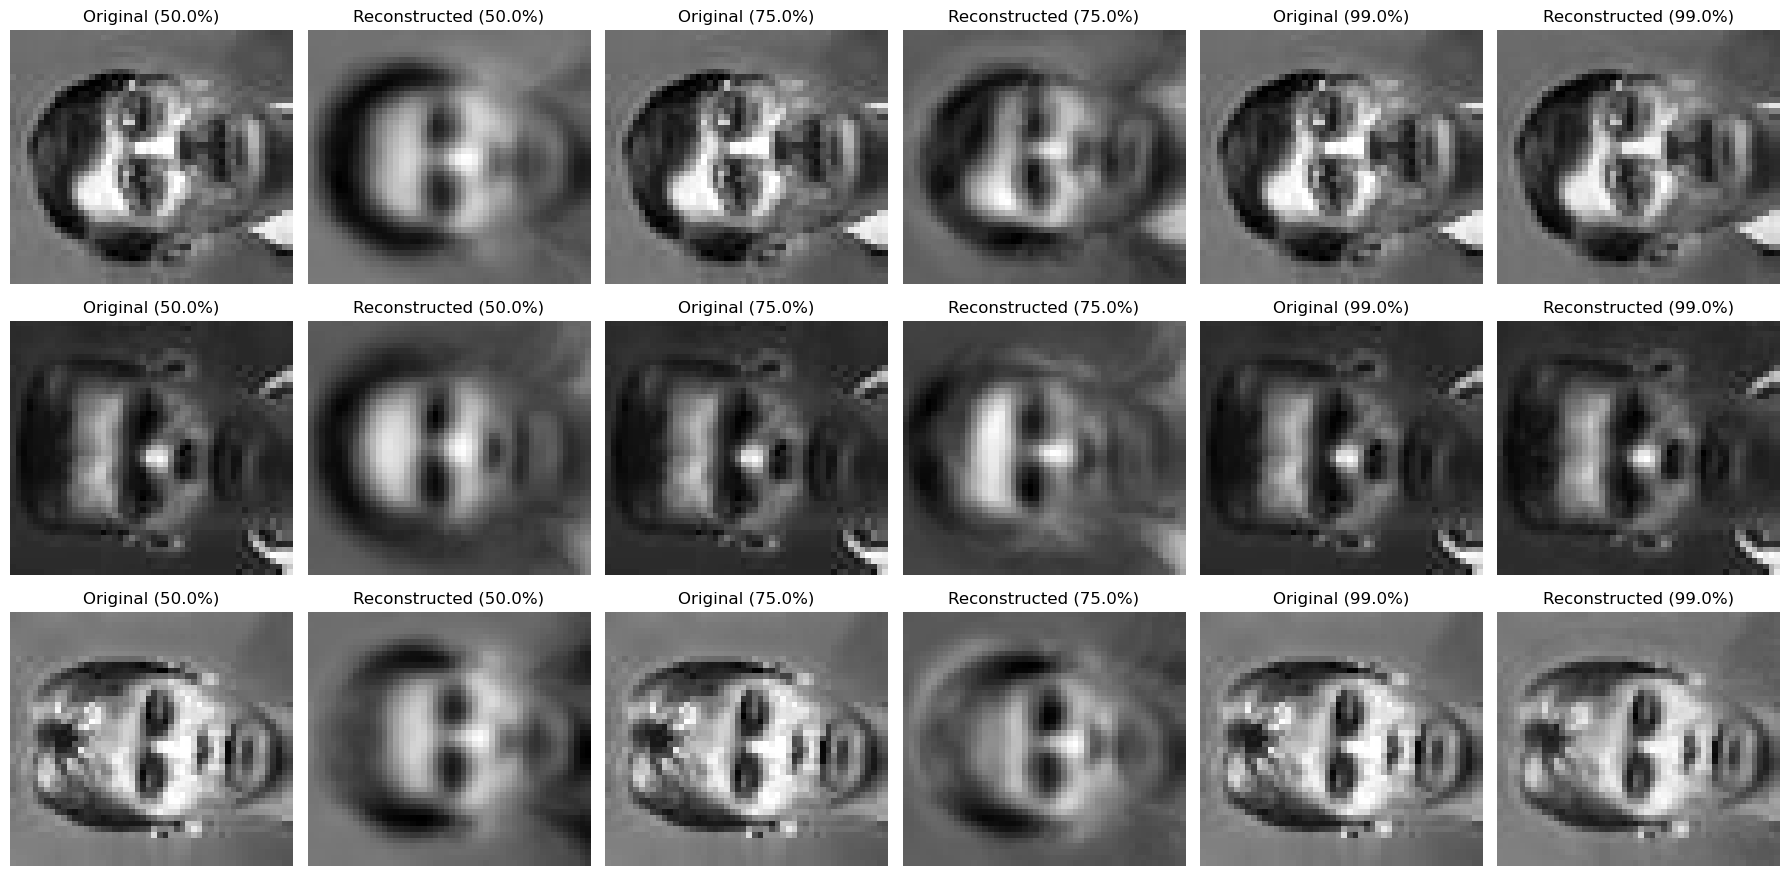

In [5]:
########## YOUR SOLUTION HERE ##########
# Plot original images and their reconstructions
fig, axes = plt.subplots(3, 6, figsize=(18, 9))

for i, threshold in enumerate(variance_thresholds):
    pca_model = pca_models[i]
    compressed_data = compressed_data_list[i]
    
    # Decompress the data
    reconstructed_data = decompress_data(pca_model, compressed_data)
    
    # Plot a few original images and their reconstructions
    for j in range(3):
        # Original images
        original_image = data[j].reshape(45, 50)
        axes[j, 2*i].imshow(original_image, cmap='gray')
        axes[j, 2*i].set_title(f'Original ({threshold*100}%)')
        axes[j, 2*i].axis('off')
        
        # Reconstructed images
        reconstructed_image = reconstructed_data[j].reshape(45, 50)
        axes[j, 2*i+1].imshow(reconstructed_image, cmap='gray')
        axes[j, 2*i+1].set_title(f'Reconstructed ({threshold*100}%)')
        axes[j, 2*i+1].axis('off')

plt.tight_layout()
plt.show()


<h3 style="color:rgb(210,90,80)">Exercise 5 (5 points):</h3>

Comment on your observations. What type of information is preserved using the 3 different compression rates, what is lost?

########## YOUR SOLUTION HERE ##########

With different compression rates, different amounts of gradients, sharpness (information) is lost. Details are lost. 
Only the most prominent features are kept. Features with the highest amount of carrying information. 

<h2 style="color:rgb(0,120,170)">PCA vs. Kernel PCA</h2>

Consider the two-dimensional data sets pca3.csv and pca4.csv
(the latter data set has as a third column as label, which should be used for coloring
the plots). First let us read the data, and for pca4 we additionally separate label from date:

In [6]:
#Read data. Nothing to do here!
data3 = np.genfromtxt('pca3.csv', delimiter = ',', skip_header = 0) 
data4 = np.genfromtxt('pca4.csv', delimiter = ',', skip_header = 0)

<h3 style="color:rgb(0,120,170)">Exercise 6 (10 Points):</h3>

* Perform PCA for data3 and data4, visualize the principal components together with the data and
determine the proportion of variance for each of the components.

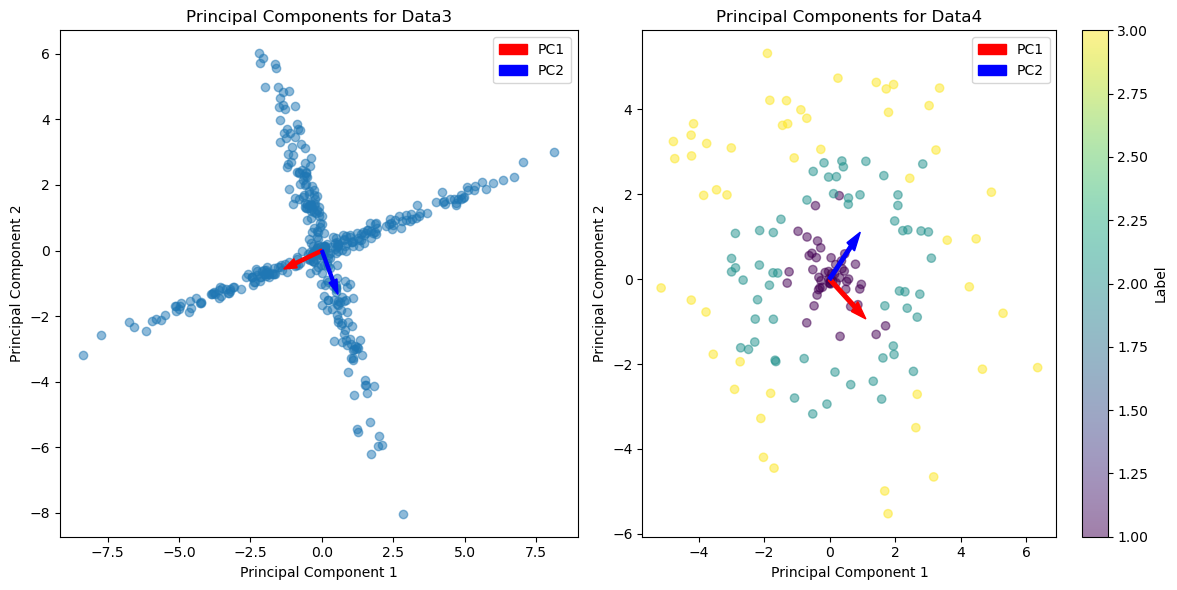

Proportion of variance explained by each component for data3: [0.593217 0.406783]
Proportion of variance explained by each component for data4: [0.54469358 0.45530642]


In [7]:
########## YOUR SOLUTION HERE ##########
# Read data
data3 = np.genfromtxt('pca3.csv', delimiter=',', skip_header=0)
data4 = np.genfromtxt('pca4.csv', delimiter=',', skip_header=0)

# Perform PCA
pca3 = PCA()
pca4 = PCA()


pca3.fit(data3)
pca4.fit(data4[:, :-1])  # Exclude the label column


# Proportion of variance for each component
variance_ratio3 = pca3.explained_variance_ratio_
variance_ratio4 = pca4.explained_variance_ratio_

# Components
components_3 = pca3.components_
components_4 = pca4.components_

# Visualize the principal components together with the data for data3
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(data3[:, 0], data3[:, 1], alpha=0.5) # display 1st and 2nd column of data

# Display Principal components
plt.arrow(0, 0, components_3[0][0], components_3[0][1], color='red', width=0.1, label="PC1")
plt.arrow(0, 0, components_3[1][0], components_3[1][1], color='blue', width=0.1,label="PC2")

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Principal Components for Data3')
plt.legend()

# Visualize the principal components together with the data for data4
plt.subplot(1, 2, 2)
plt.scatter(data4[:, 0], data4[:, 1], c=data4[:, 2], alpha=0.5)

# Display Principal Components
plt.arrow(0, 0, components_4[0][0], components_4[0][1], color='red', width=0.1, label="PC1")
plt.arrow(0, 0, components_4[1][0], components_4[1][1], color='blue', width=0.1,label="PC2")

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Principal Components for Data4')
plt.legend()

# plf graph
plt.colorbar(label='Label')
plt.tight_layout()
plt.show()

# Print the proportion of variance for each component
print("Proportion of variance explained by each component for data3:", variance_ratio3)
print("Proportion of variance explained by each component for data4:", variance_ratio4)

<h3 style="color:rgb(0,120,170)">Exercise 7 (20 points):</h3>

* Perform Kernel PCA on both datasets. Try polynomial and RBF-kernels. For polynomial kernel use at least the parameters $\gamma=2$ and degree $3$, for RBF $\gamma=0.25$. You are of course allowed (and encourgaged) to try more different parameters and also different kernels to get a better feeling.

* Also visualize the projected data together with the original ones. 

* Finally, visualize the projection onto the first principal component in the RBF-kernel plots for data4 (can also be done together in one plot). This should also convince you about the fact that the first PC already contains a huge part of the information of the data, e.g. the data can already be well separated by the first PC. 

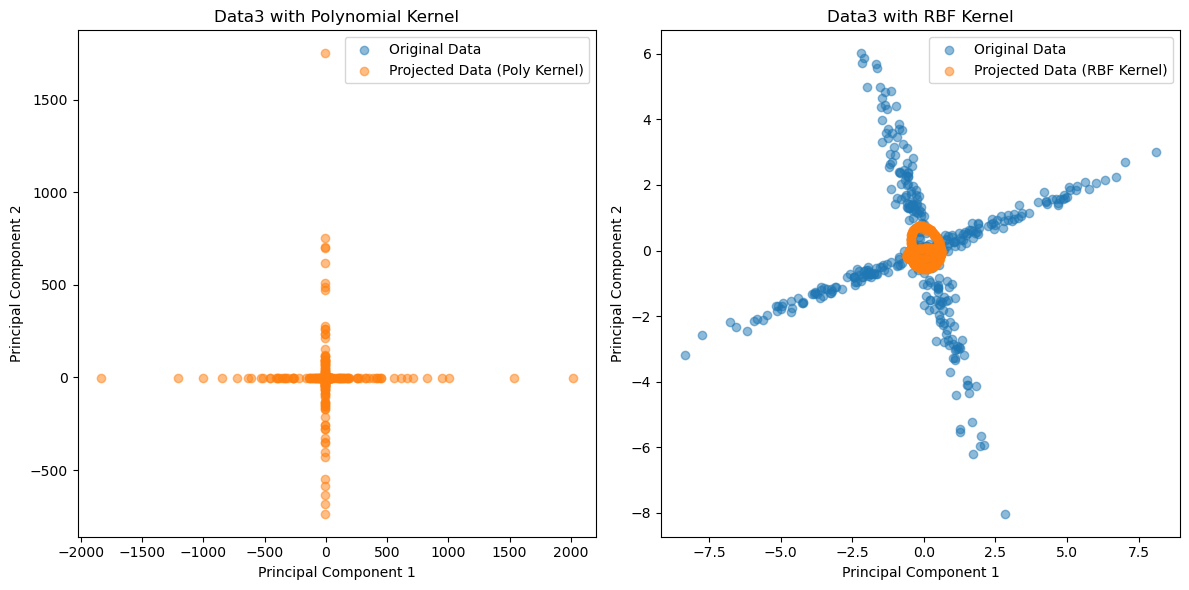

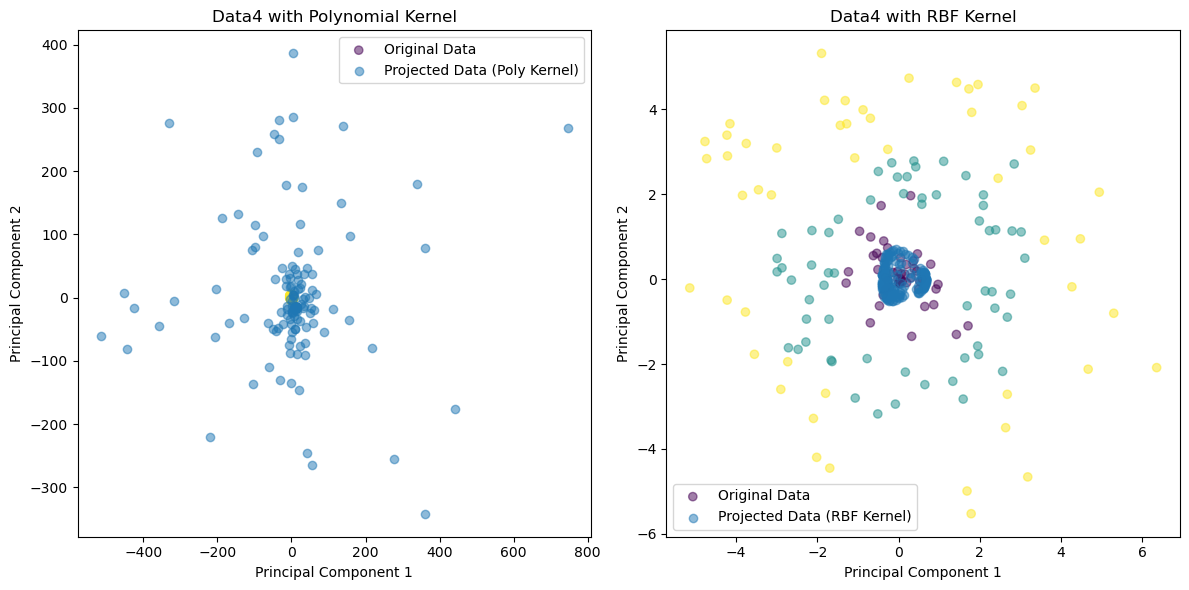

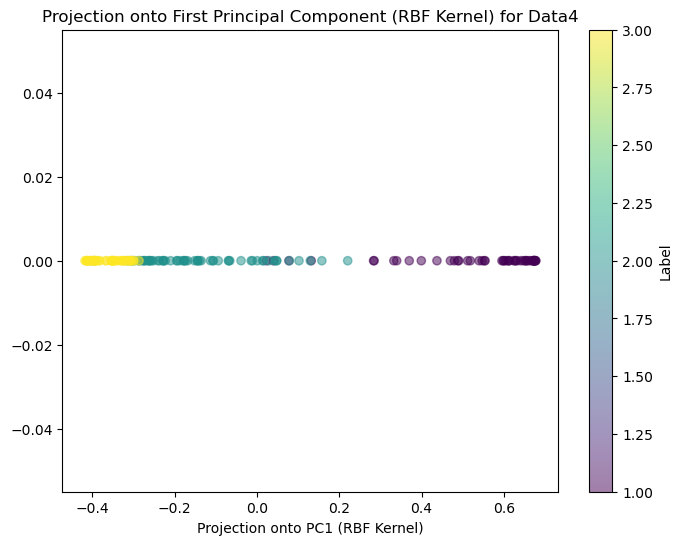

In [11]:
########## YOUR SOLUTION HERE ##########
# Read data
data3 = np.genfromtxt('pca3.csv', delimiter=',', skip_header=0)
data4 = np.genfromtxt('pca4.csv', delimiter=',', skip_header=0)

# Define parameters for polynomial and RBF kernels
gamma_poly = 2
degree_poly = 3
gamma_rbf = 0.25

# Perform Kernel PCA for data3 with polynomial kernel
kpca_poly_3 = KernelPCA(kernel='poly', gamma=gamma_poly, degree=degree_poly)
data3_poly = kpca_poly_3.fit_transform(data3)

# Perform Kernel PCA for data3 with RBF kernel
kpca_rbf_3 = KernelPCA(kernel='rbf', gamma=gamma_rbf)
data3_rbf = kpca_rbf_3.fit_transform(data3)

# Perform Kernel PCA for data4 with polynomial kernel
kpca_poly_4 = KernelPCA(kernel='poly', gamma=gamma_poly, degree=degree_poly)
data4_poly = kpca_poly_4.fit_transform(data4[:, :-1])

# Perform Kernel PCA for data4 with RBF kernel
kpca_rbf_4 = KernelPCA(kernel='rbf', gamma=gamma_rbf)
data4_rbf = kpca_rbf_4.fit_transform(data4[:, :-1])

# Visualize the projected data together with the original ones for data3
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(data3[:, 0], data3[:, 1], label='Original Data', alpha=0.5)
plt.scatter(data3_poly[:, 0], data3_poly[:, 1], label='Projected Data (Poly Kernel)', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data3 with Polynomial Kernel')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(data3[:, 0], data3[:, 1], label='Original Data', alpha=0.5)
plt.scatter(data3_rbf[:, 0], data3_rbf[:, 1], label='Projected Data (RBF Kernel)', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data3 with RBF Kernel')
plt.legend()

plt.tight_layout()
plt.show()

# Visualize the projected data together with the original ones for data4
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(data4[:, 0], data4[:, 1], c=data4[:, 2], label='Original Data', alpha=0.5)
plt.scatter(data4_poly[:, 0], data4_poly[:, 1], label='Projected Data (Poly Kernel)', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data4 with Polynomial Kernel')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(data4[:, 0], data4[:, 1], c=data4[:, 2], label='Original Data', alpha=0.5)
plt.scatter(data4_rbf[:, 0], data4_rbf[:, 1], label='Projected Data (RBF Kernel)', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data4 with RBF Kernel')
plt.legend()

plt.tight_layout()
plt.show()

# Visualize the projection onto the first principal component for data4 with RBF kernel
plt.figure(figsize=(8, 6))
plt.scatter(data4_rbf[:, 0], np.zeros_like(data4_rbf[:, 0]), c=data4[:, 2], alpha=0.5)
plt.xlabel('Projection onto PC1 (RBF Kernel)')
plt.title('Projection onto First Principal Component (RBF Kernel) for Data4')
plt.colorbar(label='Label')
plt.show()

<h3 style="color:rgb(0,120,170)">Exercise 8 (10 points):</h3>

Can you observe advantages/disadvantages of Kernel PCA compared to PCA without
using a kernel? For which kind of data do you observe them?


########## YOUR SOLUTION HERE ##########

Kernel provide lower dimensionality representation.
Provide better description of the data

Tuning hyperparameters can be difficult

The Kernel PCA is better for data with high complexity.

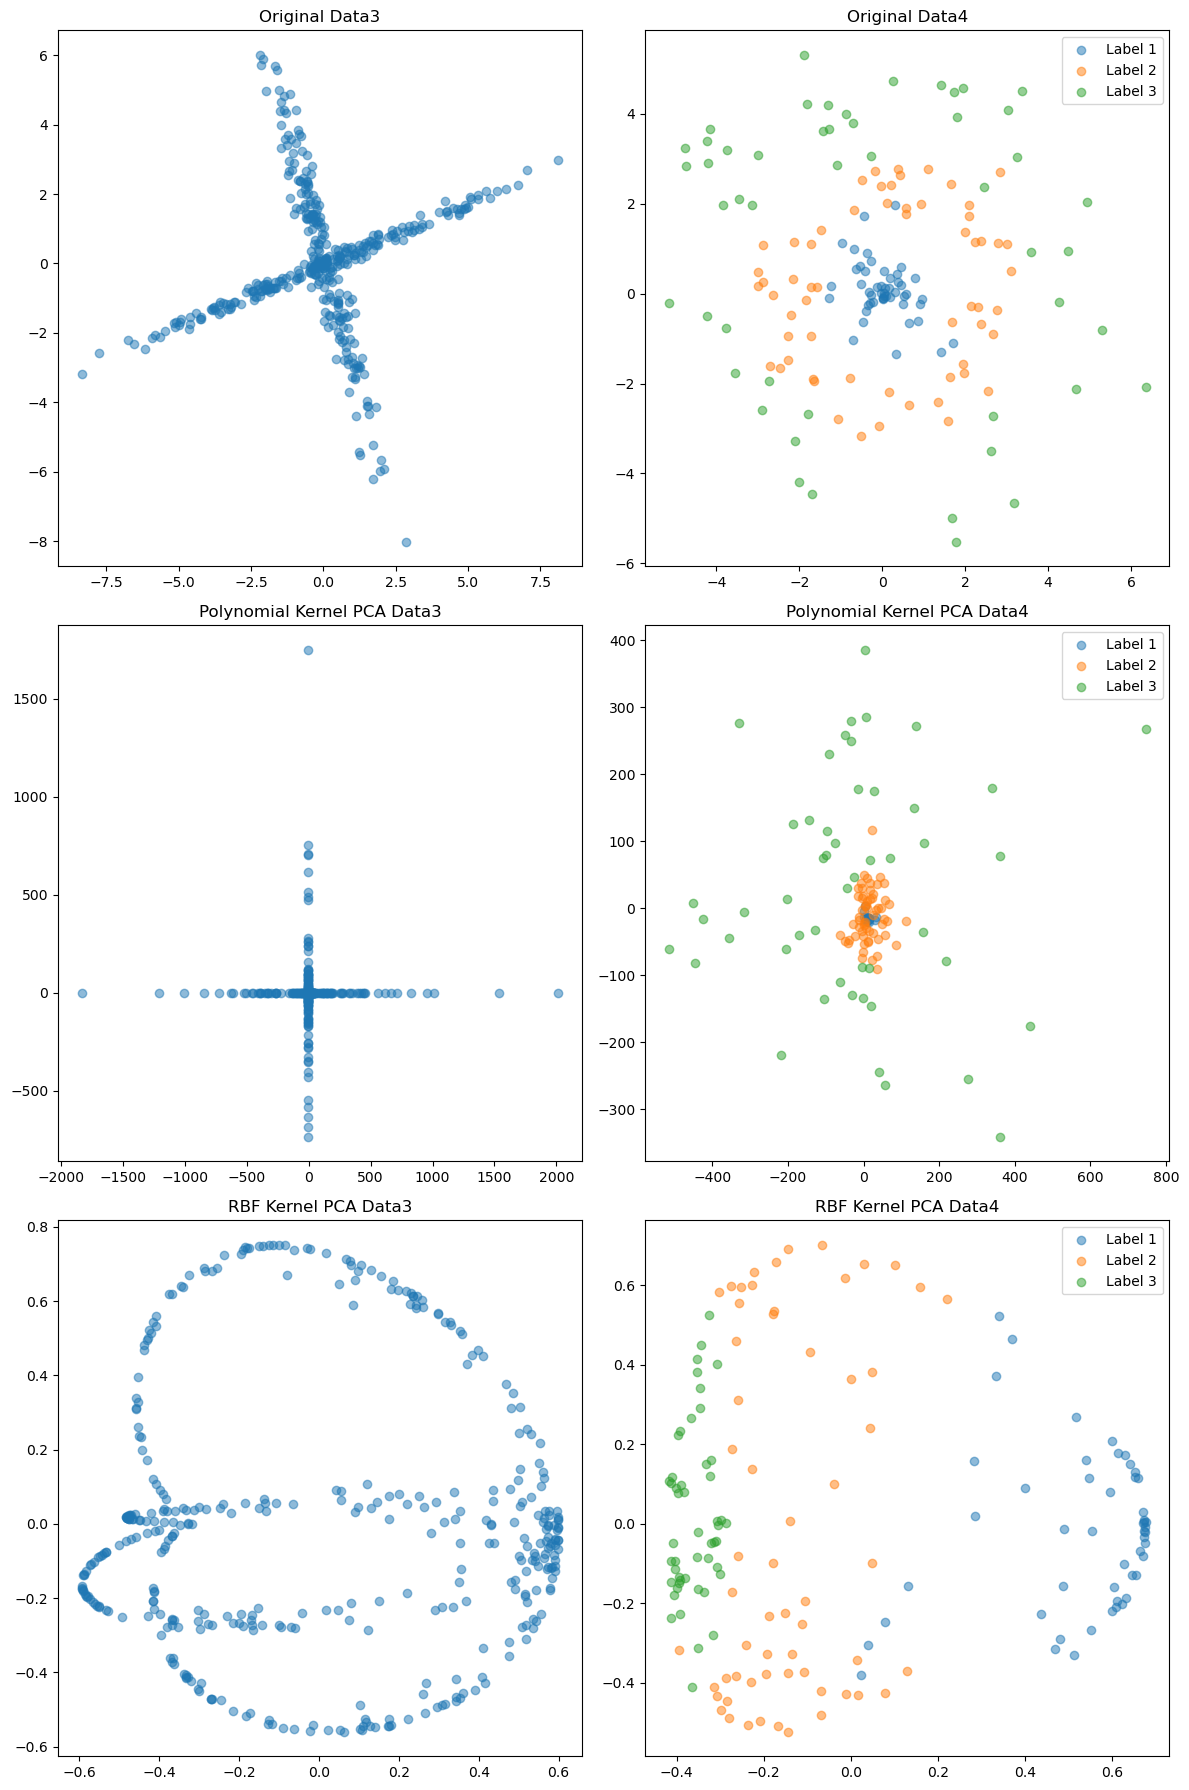

In [9]:
# Plot Datas, Poly Kernels, RBF Kernels
# Create 6 subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 18))

# Plot original data3
axes[0, 0].scatter(data3[:, 0], data3[:, 1], alpha=0.5)
axes[0, 0].set_title('Original Data3')

# Plot original data4
for label in np.unique(data4[:, -1]):
    axes[0, 1].scatter(data4[data4[:, -1] == label, 0], data4[data4[:, -1] == label, 1], label=f'Label {int(label)}', alpha=0.5)
axes[0, 1].set_title('Original Data4')
axes[0, 1].legend()

# Plot polynomial kernel PCA data3
axes[1, 0].scatter(data3_poly[:, 0], data3_poly[:, 1], alpha=0.5)
axes[1, 0].set_title('Polynomial Kernel PCA Data3')

# Plot polynomial kernel PCA data4
for label in np.unique(data4[:, -1]):
    axes[1, 1].scatter(data4_poly[data4[:, -1] == label, 0], data4_poly[data4[:, -1] == label, 1], label=f'Label {int(label)}', alpha=0.5)
axes[1, 1].set_title('Polynomial Kernel PCA Data4')
axes[1, 1].legend()

# Plot RBF kernel PCA data3
axes[2, 0].scatter(data3_rbf[:, 0], data3_rbf[:, 1], alpha=0.5)
axes[2, 0].set_title('RBF Kernel PCA Data3')

# Plot RBF kernel PCA data4
for label in np.unique(data4[:, -1]):
    axes[2, 1].scatter(data4_rbf[data4[:, -1] == label, 0], data4_rbf[data4[:, -1] == label, 1], label=f'Label {int(label)}', alpha=0.5)
axes[2, 1].set_title('RBF Kernel PCA Data4')
axes[2, 1].legend()

plt.tight_layout()
plt.show()